In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Table of Contents
- [Display Options](#Display_Options)
- [Data Frames](#DataFrame)
    - [Initialize](#initalize_df)
    - [Columns](#columns)
        - [Add Column (Standard, Apply(), Condition)](#add_col)
        - [Change order](#change_col_order)
        - [Remove Column](#remove_col)
        - [Sum Columns](#sum_col)
        - [Get Column Names](#col_names)
    - [Rows](#rows)
        - [loc](#loc)
        - [change a single value](#change_single_value)
        - [iloc](#iloc)
        - [Show Rows](#show_row)
        - [remove row](#remove_row)
        - [sum rows](#sum_row)
        - [Iterate over rows](#iter_rows)
    - [Functions](#func_dataframe)
        - [Shape](#shape_df)
        - [DTypes](#Dtype)
        - [Values](#values_df)
        - [Index](#index_df)
        - [Show Rows](#show_row)
        - [Copy](#copy_df)
        - [Reset Index](#reset_index)
        - [Isin ()](#isin_)
        - [Operations (Addition, Multiplication, sum row/column)](#operations_df)
        - [Look at data (head, sample, columns, describe, shape, mean, index, index.is_unique, value count (which value is represented how often, unique values of column))](#look_data)
        - [Clean the data (sort, fillna, dropna, drop_duplicates)](#clean_data)
        - [Concatenate](#concatenate_)
        - [Merge](#merge)
        - [Dummy Variables](#dummies)
    - [Group by](#group_by)
        - [Basic](#basic_groupby)
        - [Access groups](#access_groups_groupby)
        - [Functions (count, sum)](#func_groupby)
        - [Unstack](#unstack_groupby)
    - [Select](#select_df)
        - [Standard](#standard_select)
        - [Query](#query_select)
    - [Datetime](#datetime_)
    - [Gimmicks](#df_tricks)
        - [Pivot()](#pivot_df)
        - [Transform category to int](#cat_to_int_df)
        - [Transform dtypes](#transform_dtype)
        - [Binning using cut](#binning_cut)
        - [Split Dataset](#split_dataset)
    - [Statistics](#statistics)
        - [Check for normal or exponential distribution (k-test)](#k_test)
        - [T-test](#t_test)
        - [Binomial Test (test whether the probability for success is p)](#binom_test)
        - [Pearson Correlation](#pearson_corr)
        - [Spearman Correlation](#spearson_corr)
        - [Plot Correlation (SNS)](#sns_corr_plot)
    - [Regression](#regression_)
        - [Scaling (standardization, min-max scaling)](#scaling_reg)
        - [Ordinary least squares](#ordinary_least_square)
        - [Logistic regression](#log_reg)
        - [Res operations](#res_op)
    - [Write and Read files](#write_read_file)
- [Series](#Series) 
    - [Initialization](#initialize_ser)
    - [Functions (detect NaN - isnull, value_counts)](#func_series)
- [Numpy](#numpy) 
    - [Random Numbers](#random_numpy)
    - [Nan Numbers](#nan_numpy)
- [List](#list)
    - [Iterate over several lists](#iterate_zip)
- [String](#string)
    - [Functions](#string_func)
        - [.endswith()](#endswith)
- [General](#general_stuff)
    - [Decimals after comma](#decimal_after_comma)

Display Options: <a class="anchor" id="Display_Options"></a>

In [93]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# DataFrames: <a class="anchor" id="DataFrame"></a>

In [94]:
#Hide
#generate 25 random values between 0 and 1
ftr1 = np.random.random(25)
ftr1 = pd.Series(ftr1)

ftr2 = np.random.random(25)
ftr2 = pd.Series(ftr1)

ftr3 = np.random.random(25)
ftr3 = pd.Series(ftr1)

In [95]:
list_ = ['la', 'le', 'li', 'lo', 'lu']

## Initialize <a class="anchor" id="initalize_df"></a>

In [96]:
df = pd.DataFrame([], columns=['ftr1', 'ftr2', 'ftr3'])

frame = {'ftr1': ftr1, 'ftr2': ftr2, 'ftr3': ftr3}

df = pd.DataFrame(frame)

Transform a list to a DataFrame:

In [97]:
tmp = []
for position, value in enumerate(list_):
    tmp.append({'position':position, 'value': value})

tmp_df = pd.DataFrame(tmp)

## Columns: <a class='anchor' id='columns'></a>

Add Column: <a class='anchor' id='add_col'></a>

In [98]:
'''Standard'''
df_changed = df.copy()
df_changed['new_ftr'] = df['ftr2']
#df_changed

'''apply()'''
df_changed['new_ftr2'] = df['ftr1'].apply(lambda x: 1 if x < 0.5 else 0)
#df_changed

'''Condition'''
#Separate Conditions with commas if there are severals
condition = [
    (df['ftr1'] < 0.7) & (df['ftr2'] > 0.3)
]
value = [1]
df_changed['new_ftr3'] = np.select(condition, value, default=0)
#df_changed

Change Order: <a class='anchor' id='change_col_order'></a>

In [99]:
df_changed = df[['ftr2', 'ftr3', 'ftr1']]
#df_changed.head()

Remove Column: <a class='anchor' id='remove_col'></a>

In [100]:
df_changed = df.copy()
df_changed = df_changed.drop('ftr1', axis=1)
#df_changed.head()

Sum up Columns: <a class='anchor' id='sum_col'></a>

In [101]:
sum_column = df.sum(axis=0)

Get Column Names: <a class='anchor' id='col_names'></a>

In [102]:
df.columns
a=1

## Rows: <a class='anchor' id='rows'></a>

loc <a class='anchor' id='loc'></a> <br>
loc uses the index, so either a number or a label.

In [103]:
df.loc[0]
df.loc[df['ftr1']>0.5]
a=1

Change single Value: <a class='anchor' id='change_single_value'></a>

In [104]:
df_changed = df.copy()
idx = 2
df_changed.loc[idx, 'ftr1'] = 10

#change multiple values
df_changed = df.copy()
df_changed.loc[df_changed['ftr1'] > 0.5, 'ftr1'] = 2

iloc <a class='anchor' id='iloc'></a> <br>
like loc but uses position instead of index/label:

In [105]:
df.iloc[idx]
a=1

### remove a row <a class='anchor' id='remove_row'></a>

In [106]:
#idx = 2
df_changed = df.copy()
df_changed = df_changed.drop(idx)
#df_changed.head()

### sum rows: <a class='anchor' id='sum_row'></a>

In [107]:
sum_row = df[['ftr1','ftr2']].sum(axis=1) #sums up every row of ftr1 and ftr2

### iterate over rows: <a class='anchor' id='iter_rows'></a>

In [ ]:
for df_idx, df_row in df.iterrows():
    a=1

## Functions <a class='anchor' id='func_dataframe'></a>

### Shape: <a class='anchor' id='shape_df'></a>

In [108]:
df.shape
a=1

### Types: <a class='anchor' id='Dtype'></a>

In [109]:
#Returns the different types of the columns
df.dtypes
a=1

### Values
Shows all values <a class='anchor' id='values_df'></a>

In [110]:
df.values
a=1

### Index <a class='anchor' id='index_df'></a>

In [111]:
#return indexes
df.index

RangeIndex(start=0, stop=25, step=1)

### Show rows: <a class='anchor' id='show_row'></a>

In [112]:
n=3
#Show first n rows:
df[:n]
a=1

### Copy:
<a class='anchor' id='copy_df'></a>

In [113]:
df_changed = df.copy()

### Reset index <a class='anchor' id='reset_index'></a>

In [114]:
df_changed = df[df['ftr1']<0.2]
#adding a new index
df_changed.reset_index()
#adding a new index plus removing the old one
df_changed.reset_index(drop=True)
a=1

### Isin() <a class='anchor' id='isin_'></a>

In [115]:
df_special = pd.DataFrame([['Alice', 21], ['Bob', 22], ['Charlie', 23]],
                  columns=['Name', 'Age'])

df_special['Name'].isin(['Flo','Lars'])
df_special['Name'].isin(['Bob','Lars'])

any(df_special['Name'].isin(['Flo','Lars']))
any(df_special['Name'].isin(['Bob','Lars']))

a=1


### Operations: <a class='anchor' id='operations_df'></a>

In [262]:
'''Addition: add one dataframe to another'''
df_added = df.add(df)
#df_added.head()
#you can also df.add(df, fill_value = 3) to avoid nans. Replaces NaN values by 3.
df_changed= df.copy()
df_changed.loc[2,'ftr1'] = np.nan
df_added_nan = df.add(df_changed, fill_value=3)
#df_added_nan.head()

'''sum rows '''
sum_row = df[['ftr1','ftr2']].sum(axis=1) #sums up every row of ftr1 and ftr2
'''sum column'''
sum_column = df.sum(axis=0)

'''Multiplication'''
double = df_changed['ftr1'].mul(2)


### Look at the data: <a class='anchor' id='look_data'></a>

In [138]:
df.head(1)
df.sample() #like head() but random
#df.sample(5, replace=True, weights='ftr1') #Weights high values for ftr1 higher (higher probability to select those)

df.columns
df.index
df.index.is_unique
df.shape
df.describe()
df['ftr1'].describe()
df.mean()
#df_changed.mean(skipna=True, numeric_only=True)

#count which value is represented how often
df['ftr1'].value_counts()
#Returns all values of a dataframes column and the UNIQUE VALUES:
df_special = pd.DataFrame([['Alice', 21], ['Bob', 22], ['Charlie', 23], ['Charlie', 23], ['Charlie', 23]], columns=['Name', 'Age'])
s = pd.Categorical(df_special['Name'])
unique_values = s.categories

a=1

### Clean the data: <a class='anchor' id='clean_data'></a>

In [118]:
df_changed = df.copy()

#order the index
df_changed.sort_index(ascending=False) #by default alphabetically or ascending
df_changed['ftr1'].sort_values() #index gets updated automatically
df_changed

#Check for NaNs
len(df[df.isna().any(axis=1)])

#drop NaNs (drops the entire row)
df_changed.loc[2, 'ftr2'] = np.nan
df_changed.loc[5] = np.nan
df_changed = df_changed.dropna()
#df_changed = df_changed.dropna(how='all') #removes only the rows where all columns have NaN
df_changed

#Fills NaNs
df_changed = df.copy()
df_changed.loc[2] = np.nan
#df_changed = df_changed.fillna(15)
df_changed.fillna(15, inplace = True) #Adds the changes directly to the original dataframe
#df_changed.fillna({'ftr1':12, 'ftr2':15}, inplace=True) #specify columns
df_changed

#drop duplicates
df_changed = df.copy()
df_changed.loc[df_changed['ftr1'] > 0.5, 'ftr1'] = 2
df_changed = df_changed.drop_duplicates('ftr1')


#a=1

### Concatenate <a class='anchor' id='concatenate_'></a>

In [223]:
df_changed = df.copy()

# Add below (vertically)
pd.concat([df_changed, df_changed], axis=0)

# Add to the right (horizontally)
pd.concat([df_changed, df_changed], axis=1)

a=1

### Merge: <a class='anchor' id='merge'></a>

In [273]:
df_changed1 = df[['ftr1', 'ftr2']].copy()
df_changed2 = df[['ftr1', 'ftr3']].copy()

merged = pd.merge(df_changed1, df_changed2, on='ftr1')

### Dummy Variables: <a class='anchor' id='dummies'></a>

In [284]:
df_changed = df_special.copy()
df_dummies = pd.get_dummies(df_changed)

## Groupby: <a class='anchor' id='group_by'></a>

### Basic: <a class='anchor' id='basic_groupby'></a>

In [146]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_grouped = df_special.groupby('Name')
#df_grouped.head()

### Access groups: <a class='anchor' id='access_groups_groupby'></a>

In [157]:
Names = pd.Categorical(df_special['Name']).categories
df_grouped.get_group(Names[2])

a=1

### Functions: <a class='anchor' id='func_groupby'></a>

In [169]:
'''Count -> count number of elements per group'''
counts = df_grouped.count()
counts

'''Size -> almost better than count. size() returns a pandas Series'''
size = df_grouped.size()
#plot
#plt.bar(size.index, size)
#Access single count:
position1 = np.where(size.index == 'Alice')[0][0]
position2 = np.where(size.index == 'Bob')[0][0]

access_single_count = size[position1]

'''sum -> takes the sum of the values'''
sum = df_grouped.sum()
sum

a=1
access_single_count

3

### Unstack: <a class='anchor' id='unstack_groupby'></a>

In [148]:
#finish later
df_unstacked = df_special.groupby(['Name', 'day']).unstack()
df_unstacked

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

## Select: <a class='anchor' id='select_df'></a>

### Standard <a class='anchor' id='standard_select'></a>

In [119]:
#Standard:
df_changed = df[df['ftr1']> 0.5]

### Query <a class='anchor' id='query_select'></a>

In [120]:
df_changed = df.query('ftr1 > 0.4 & ftr2 < 0.5')
#df_changed

## Datetime <a class='anchor' id='datetime_'></a>

In [233]:
df_time = pd.DataFrame(['1998-04-28 09:32:13', '1998-04-28 09:32:13','1998-04-28 09:32:13'], columns=['date'])

#Transform string to datetime
df_time['date'] = pd.to_datetime(df_time['date'], format="%Y-%m-%d %H:%M:%S")

#extract year
df_time['year']= df_time['date'].dt.year

#extract month
df_time['month']= df_time['date'].dt.month


## Gimmicks: <a class='anchor' id='df_tricks'></a>

### Pivot() <a class='anchor' id='pivot_df'></a>

In [121]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_special.pivot(index='day', columns = 'Name', values = 'hours')

a=1

### Transform categorical features into integers: <a class='anchor' id='cat_to_int_df'></a>

In [143]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_special
df_special['Name'] = df_special['Name'].astype('category')
df_special['Name'] = df_special['Name'].cat.codes
df_special
a=1

### Transform dtypes: <a class='anchor' id='transform_dtype'></a>

In [280]:
variable = 'hello'
type(variable)

str

In [279]:
ftr1_string = df['ftr1'].astype(str)

#other types are: int, float, bool

str

### Binning using cut(): <a class='anchor' id='binning_cut'></a>

In [ ]:
df_changed = df.copy()
bins = [0, 0.25,0.5,0.75,1]
df_changed['bins'] = pd.cut(df_changed['ftr1'], bins)
df_changed

### Split a DataSet: <a class='anchor' id='split_dataset'></a>

In [ ]:
def split_data(df, ratio=0.8):
    mask = np.random.rand(len(df)) < ratio
    #first is the training, second the test set
    return [df[mask].reset_index(drop=True), df[~mask].reset_index(drop=True)]

## Statistics: <a class='anchor' id='statistics'></a>

### Check if data comes from a given distribution (ktest): <a class='anchor' id='k_test'></a>

In [193]:
from statsmodels.stats import diagnostic

In [195]:
d = diagnostic.kstest_normal(df['ftr1'].values, dist='norm')
ksstat = d[0]
p_value = d[1] #p-value for the Null-hypothesis of the data being normally distributed. Low p-value -> not normally distributed

#for exponential distribution replace 'norm' by 'exp', 

### T-test: <a class='anchor' id='t_test'></a>
To test whether the means of two distinct populations differ.

In [206]:
from scipy.stats import ttest_ind

In [207]:
#Independent t-test (Two groups of independent samples or scores)
t = ttest_ind(df['ftr1'], df['ftr2'])
t_value = t[0]
p_value = t[1]

Ttest_indResult(statistic=0.0, pvalue=1.0)

### Binomial test <a class='anchor' id='binom_test'></a>
Perform a test that the probability of success is p.

In [216]:
from statsmodels.stats.proportion import binom_test

In [218]:
nbrS = 5 #number of success
nbrT = 10 #number of trials
pS = 0.5 #the probability for a success under the null hypothesis
#if p-value is low, the probability is wrong
p_value = binom_test(nbrS,nbrT,pS)

1.0

### Pearson correlation: <a class='anchor' id='pearson_corr'></a>

In [197]:
from scipy.stats import pearsonr

In [199]:
pear = pearsonr(df['ftr1'], df['ftr3'])
correlation = pear[0]
p_value = pear[1]

(1.0, 0.0)

### Spearman correlation <a class='anchor' id='spearson_corr'></a>

In [200]:
from scipy.stats import spearmanr

In [203]:
spear = spearmanr(df['ftr1'], df['ftr3'])
correlation = spear[0]
p_value = spear[1]

### Plot Correlation using sns <a class='anchor' id='sns_corr_plot'></a>

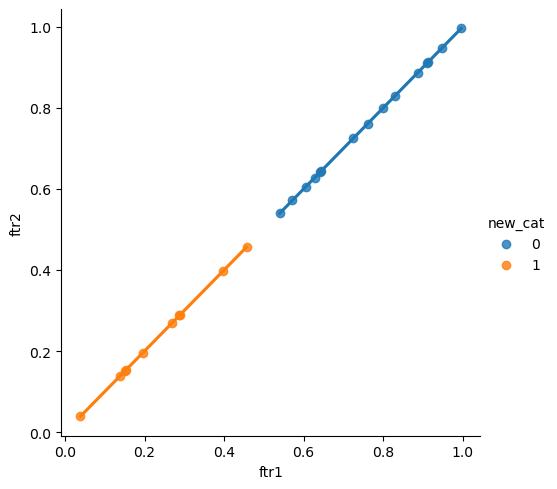

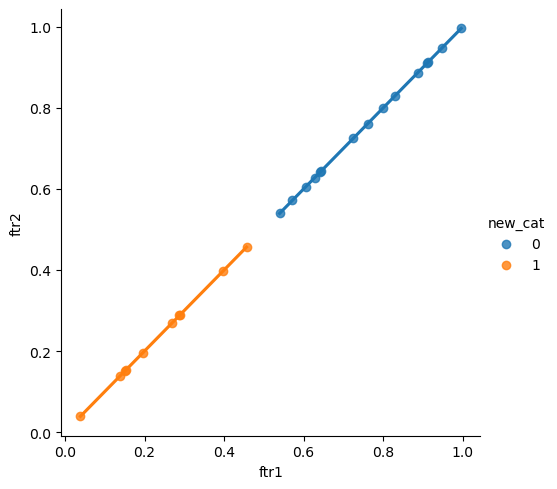

In [215]:
df_changed = df.copy()
df_changed['new_cat'] = df_changed['ftr1'].apply(lambda x: 1 if x < 0.5 else 0)
sns.lmplot(x='ftr1',y='ftr2', hue='new_cat',data=df_changed)
#hue groups the datapoints by their categories in 'new_cat'
plt.show()

## Regression: <a class='anchor' id='regression_'></a>

In [241]:
df_regression = pd.DataFrame({'ftr1': [1, 2, 3, 4, 5], 'ftr2': [1, 4, 9, 16, 25], 'ftr3': ['a','b','b','a','b']})

Scaling the features: <br> <a class='anchor' id='scaling_reg'></a>
To avoid to weight features with big values higher. <br>
Standardization is one form of scaling. <br>
Min-max scaling is another one.

In [242]:
#standardization
ftr1 = df_regression['ftr1']
ftr2 = df_regression['ftr2']

df_regression['ftr1'] = (ftr1 - ftr1.mean())/ftr1.std()
df_regression['ftr2'] = (ftr2 - ftr2.mean())/ftr2.std()

#Min max scaling
min1 = ftr1.min()
max1 = ftr1.max()
min2 = ftr2.min()
max2 = ftr2.max()

#df_regression['ftr1'] = (ftr1 - min1)/(max1 - min1)
#df_regression['ftr2'] = (ftr2 - min2)/(max2 - min2)


### Ordinary least squares: <a class='anchor' id='ordinary_least_square'></a>

In [239]:
import statsmodels.formula.api as smf

In [245]:
#ftr3 is categorical, ftr1/2 are continuous
#binary is also categorical
#interaction is written ftr1:ftr2
mod = smf.ols(formula='ftr1~ ftr2 + ftr1:ftr2 + C(ftr3)', data=df_regression)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   ftr1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2470.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):             0.0148
Time:                        14:00:56   Log-Likelihood:                 15.740
No. Observations:                   5   AIC:                            -23.48
Df Residuals:                       1   BIC:                            -25.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1708      0.022      7.613   

c:\Users\flori\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


R-square: how much variance can be explained by the model.

### Logistic Regression: <a class='anchor' id='log_reg'></a> <br>
predicts a binary and not continuous outcome 

In [ ]:
mod = smf.logit(formula='ftr1~ ftr2 + ftr1:ftr2 + C(ftr3)', data=df_regression)
np.random.seed(2)
res = mod.fit()
print(res.summary())

### res operations: <a class='anchor' id='res_op'></a>

In [255]:
#get the INDEX of the variables in the model:
res.params.index #'Intercept', 'C(ftr3)', 'ftr2', 'ftr1:ftr2'

#Get the COEFFICIENTS:
res.params.values

#Get the P-VALUES
res.pvalues

#Get the STANDARD ERRORS
res.bse.values

#Get CONFIDENCE INTERVALS
res.conf_int()

#Get PREDICTED VALUES from the model, using the training datapoints
res.predict()

array([-1.2589369 , -0.64810216,  0.01493541,  0.62648137,  1.26562227])

## Write or read files: <a class='anchor' id='write_read_file'></a>

In [ ]:
#read csv
'''data = pd.read_csv('PATH/file_name.csv')'''
'''data = pd.read_csv('PATH/file_name.csv', skiprows=5, nrows=7, na_values=['N/A', 'n/a'])'''
'''     skips the first five rows, alternatively use skiprows=[3,2,5] -> skips row 3,2 and 5 '''
'''     nrows=7 -> import only the first 7 rows'''
'''     na_values will treat all 'N/A' and 'n/a' entries as NaN as well'''
#write a csv
'''df.to_csv('name.csv')'''

#read an excel
'''data = pd.read_excel('PATH/name.xlsx')'''

import pickle
#write a pickle
'''with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)'''

#load a pickle
'''with open('PATH/data.pkl', 'rb') as f:
    data = pickle.load(f)'''

# Series: <a class='anchor' id='Series'></a>

## Initialize: <a class='anchor' id='initialize_ser'></a>

In [172]:
ser = pd.Series([1, 1,3,3,3, 7, 3, 5, 7, 9])

## Functions: <a class='anchor' id='func_series'></a>

In [122]:
#hide
data = np.random.random(5)
series = pd.Series(data)
series[0] = np.nan

In [184]:
#Detect NaN values (not 0)
series.notnull()
series.isnull()

#Value counts (which value appears how often): (sort_index to have highest count first)
counts = ser.value_counts().reset_index().sort_index()
counts.iloc[0]

a=1

# Numpy <a class='anchor' id='numpy'></a>

## random numbers: <a class='anchor' id='random_numpy'></a>

In [124]:
#Generate 10 random variable between 0 and 1:
data = np.random.random(10)
a=1

## Introduce a NaN number: <a class='anchor' id='nan_numpy'></a>

In [125]:
nan_ = np.nan

# List <a class='anchor' id='list'></a>

## Iterate over several lists: <a class='anchor' id='iterate_zip'></a>

In [293]:
list_a = ['a','b','c']
list_b = ['d','e','f','g']
for a, b in zip(list_a, list_b):
    print(a)
    print(b)

#you only iterate n times, where n is min(len(list_a),len(list_b))

a
d
b
e
c
f


# String: <a class='anchor' id='string'></a>

In [275]:
word= 'aRandomWord'

## Functions: <a class='anchor' id='string_func'></a>

.endswith() <a class='anchor' id='endswith'></a>

In [276]:
word.endswith('Word')

True

# General <a class='anchor' id='general_stuff'></a>

### Numbers after the comma <a class='anchor' id='decimal_after_comma'></a>

In [282]:
print('the number {:.3} will be shown with two decimals'.format(3.0394821))

the number 3.04 will be shown with two decimals
